# Pandas: Collaborative graded assignment 4
This notebook contains the fourth graded collaborative assignment of the 2023 Coding the Humanities course, and it is based on the [5. Data wrangling with Pandas](../../4_PandasDataWrangling.ipynb) course material.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is a collaborative assignment. In the text cell below, please include all the names of your group members.

Below that, answer the question using a mix of code cells and text cells in a way that would make your answers understandable to outsiders. To explain your code, you can use commenting (#) and/or text cells, similar to what you see in the course materials.

If you used code or a solution from the internet (such as StackOverflow) or another external resource, please make reference to it (in any format). Unattributed copied code will be considered plagiarism and therefore fraud.


**Authors of this answer:** Laura Vochiţa (13982540),
Anna Valenti (13530232), Izzie He (13090259), Xi Zeng (13548719)

# Assignment | Analysing Black Mirror

Black Mirror is a British near-future sci-fi series known for commenting on contemporary social issues, created by Charlie Brooker. Initially aired on the British Channel 4, it later became famous as a Netflix series. The first season was broadcast around the end of 2011, and the fifth season was released in 2019. In this assignment, we will explore this TV series' IMDB ratings, which are available in blackmirror.csv.

As always, feel free to re-use code from different questions.

For the Visualisations:
Do not worry too much about what they look like - we will talk more about visualization next week. But if you want, you can look ahead to notebook 6. The labels Panda puts on your plot will come from the dataframe, so make sure columns have sensible names there to have sensible labels.

Do make sure the visualizations are visible in the notebook when you submit it. Or, you can save your visualisations as a pdf or png file and include them in your zipped submission.

In [2]:
# to import pandas
import pandas as pd

1.   Which director has directed the most number of episodes?

In [4]:
# to read the csv file
df = pd.read_csv('/content/drive/MyDrive/2023-coding-the-humanities-main/Data/blackmirror.csv', encoding='utf-8')
df
# to create a new dataframe that only include the director and episode number colums
df_directors_episode = df[['director','episode_number']]
# to group the dataframe by "director" while counting the number of episodes by using .count() function
number_episodes= df_directors_episode.groupby('director').count()

# to use for loop to find the director with the most episodes
for index, value in number_episodes[['episode_number']].max().items():
    # to find the director with the most episodes by access group of values using labels using .loc() function
    row = number_episodes.loc[number_episodes[index]== value]
    # to print the director with the most episodes by using the f-string. 
    #Using row.index[0] to obtain the director of most episodes
    print(f"Director of the largest amount of episodes is {row.index[0]}")
    

Director of the largest amount of episodes is Owen Harris


2.   Create a function that calculates the frequency of words in a string. Apply it to the description of all of the episodes of Black Mirror. What are the ten most frequent words in the descriptions? Write down your interpretations in the notebook.

In [5]:
# to import nltk
import nltk
# to download the punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:

# to import counter 
from collections import Counter
# to import the string
import string
# to create a function to normalize the text
def normalize_text(text):
    # to make all the text in lowercase
    text = text.lower()
    #to remove the selected punctuation using .translate()function to return a stirng with replaced values
    text = text.translate(str.maketrans('', '', string.punctuation))
    # to return the normalized text
    return text

# to create a function to count the words
def count_words(text):
    # to normalize the text
    text = normalize_text(text)
    # to tokenize the text using .tokenize()function
    words = nltk.tokenize.word_tokenize(text)
    # to count the words
    counted_words = Counter(words) 
    # to find the 10 most common words using .most_common() function to return a list
    most_common_words = counted_words.most_common(10)


    # to return the 10 most common words as the result
    return most_common_words

# to create a new string with all the descriptions by using .join() function
new_desc = ''.join(df['desc'])
# defining words and store with new_desc variable counted
words= count_words(new_desc)
# to print the ten most common words
print(f"10 most common words in the Black Mirror episodes' descriptions are {words}")




10 most common words in the Black Mirror episodes' descriptions are [('a', 27), ('to', 17), ('the', 16), ('of', 14), ('and', 10), ('her', 9), ('that', 8), ('with', 8), ('but', 6), ('on', 5)]


Interpretation: mainly conjunction words are used (for example, a).
Further normalization could remove these words and obtain 10 most used words that are, for example, longer than 3 characters

3.   Create a bar plot/histogram for the IMDB ratings per episode with respect to the episode's title. From this plot, decipher which were the highest and lowest ratest shows.

<Axes: xlabel='title'>

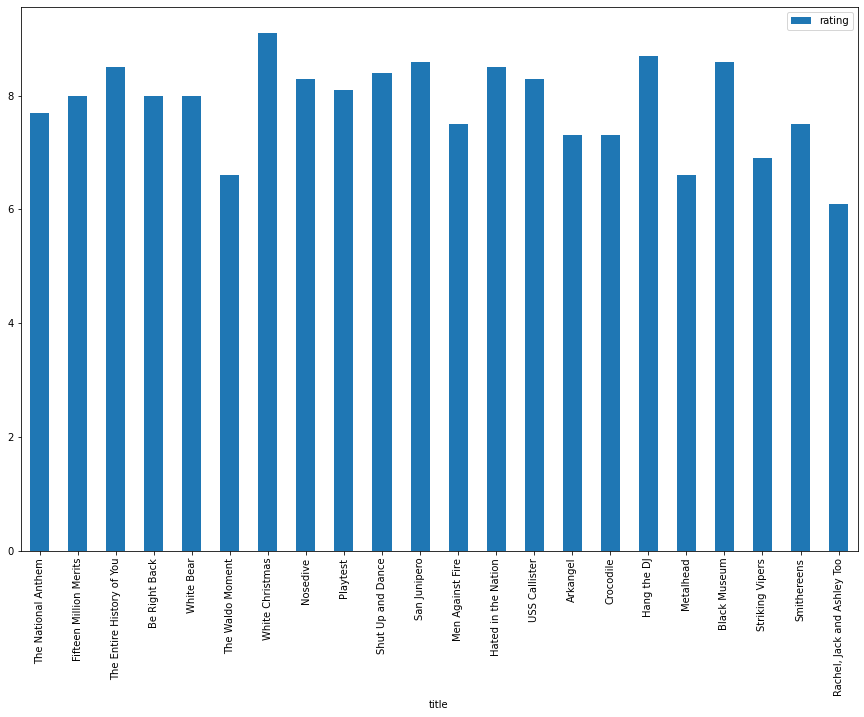

In [11]:
# to create a new dataframe with only the title and rating columns
df_rating = df[['title', 'rating']]
# to set the title column as the index by using .set_index() function
df_rating = df_rating.set_index('title')
# to plot the bar plot using .plt()function
df_rating.plot(kind='bar',figsize=(15,10))


**Interpretation**:
The lowest rating for IMDB is the episode "Rachel, Jack and Ashley Too." We argue that the reason for this particular episode to be rated only 6/10 is due to the fact that commoditization of creativity in the entertainment industry have been revealed. Although the theme of the episode seems extremely relevant to the contemporary era, the movie does not explain the issues in a greater details. In this way, topics such as AI, celebrity worship, materialism, and creativity have been reduced into invisible elements of the movie.
The highest ratied episode is the episode named "White Christmas" as above 9. People have labelled this movie as the darkest and bleakest movie from Black Mirror ever. They have been exposed to an extremely distopian world of technologized future. This cruelity reall calls audiences' emotions and overall envolvement with the movie. Thus, the high praise should not be surprised.

4.   Create two different line plots for the IMDB ratings of Black Mirror season 3 and season 4, with the episodes in their episode number order. With these plots, you can compare the ratings of the two seasons throughout. Interpret the visualisation.

Bonus: Extra point if you can put the the two lines in the same plot somehow, either by having a continuous line for season 3 and 4 or by overlaying them.
To filter the dataframe by multiple values, you could use the `isin()` function (https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) to check if an episode is in one of a list of seasons: `df.loc[df.season.isin(seasons)]` where `seasons` is a list.

<Axes: xlabel='episode_number'>

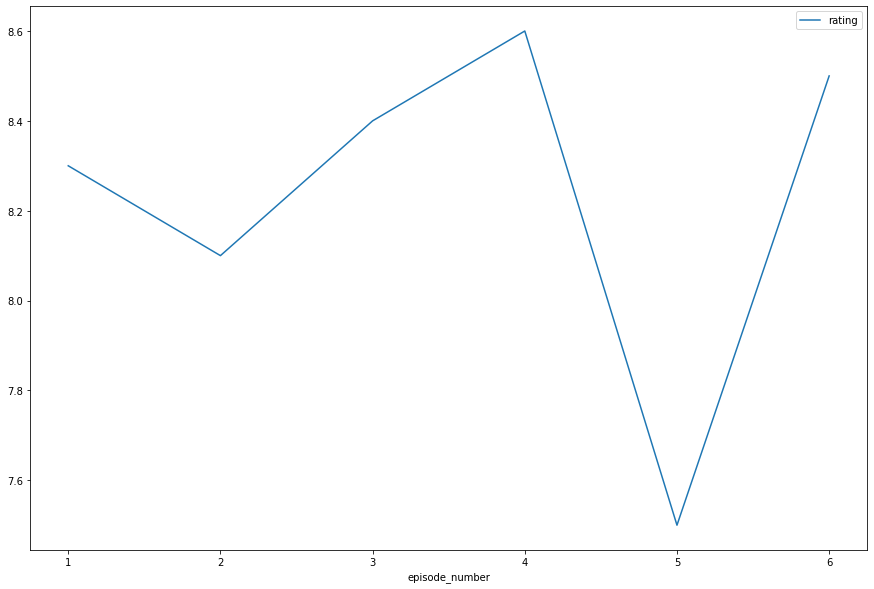

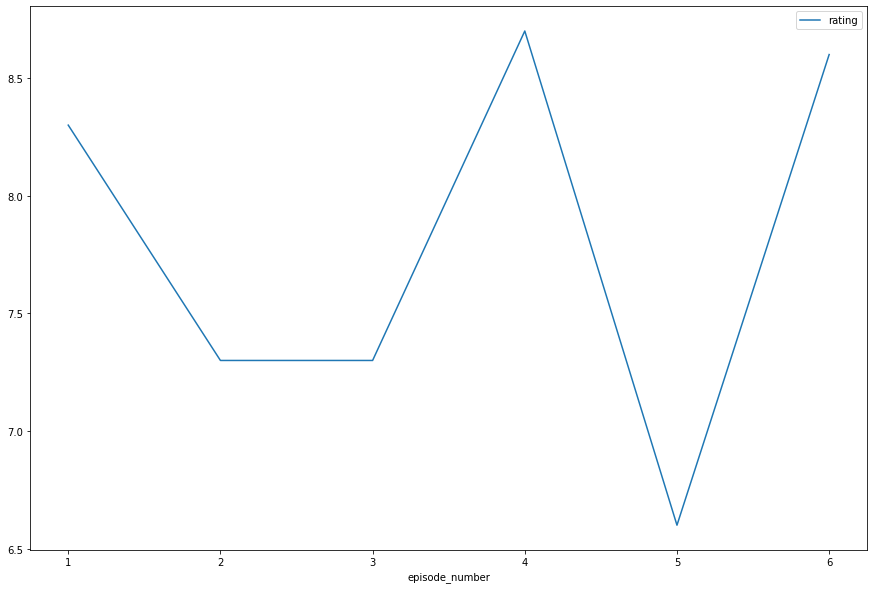

In [12]:
# to create a new dataframe with only the season 3 episodes
df_season3 = df[df['season'] == 3].sort_values('episode_number', ascending=False)
# to create a new dataframe with only the season 4 episodes
df_season4 = df[df['season'] == 4].sort_values('episode_number', ascending=False)
# to create a new dataframe with only the episode number and rating columns for season 3
rating_3 = df_season3[['episode_number', 'rating']]
# to set the episode number column as the index by using .set_index() function
df_rating3 = rating_3.set_index('episode_number')
# to plot the the line plot for season 3 by using .plot() function
df_rating3.plot(figsize=(15,10))
# to create a new dataframe with only the episode number and rating columns for season 4
rating_4 = df_season4[['episode_number', 'rating']]
# to set the episode number column as the index
df_rating4 = rating_4.set_index('episode_number')
# to plot the rating for season 4 by using .plot() function
df_rating4.plot(figsize=(15,10))


**Interpretation**

The thirs season was more successful than the fourth one. Both seasons had a low at episode 5, while the final episode always receives a higher rating in both graph. Both seasons' pilot episodes have a good rating overall. However, it is to notice that the second graph min value is smaller than the second one. As a consequence, the overall rating of season 4 is lower than that of season 3. 